In [1]:
import sys  
if '..' not in sys.path:
    sys.path.append('..')
from read import readtext

import numpy as np
import pandas as pd
import os


In [31]:
import matplotlib.pyplot as plt

In [2]:
fname=r'C:\Users\omf\Desktop\mpy_new\test\m000477.ovf'

In [7]:
    n=readtext.Read(fname)
    n.loadData(fname)
    
    csl=n.reshape3D().slicing(4)
    n.saveExcel(csl,flag='circle')

In [9]:
n.data[0].shape

(50, 50, 200)

In [11]:
self=n

In [25]:
        x,y,z=self.data[0],self.data[1],self.data[2]
        mx,my,mz=self.data[3],self.data[4],self.data[5]
        #只需要获取x=0时的位置
        y0=y[:,:,0]
        z0=z[:,:,0]
        center=[y0.mean(),z0.mean()]

In [35]:
r=np.sqrt((y0-center[0])**2+(z0-center[1])**2)   #计算距离

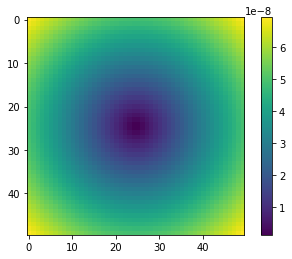

In [36]:
plt.imshow(r)
plt.colorbar()

In [67]:
rclip=[49e-9,50e-9]

In [68]:
index_r=(r>min(rclip))*(r<max(rclip))                         #筛选距离,

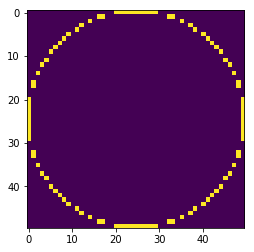

In [69]:
plt.imshow(index_r)

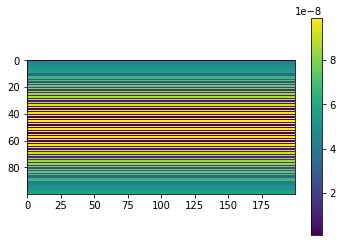

In [74]:
plt.imshow(y[index_r])
plt.colorbar()

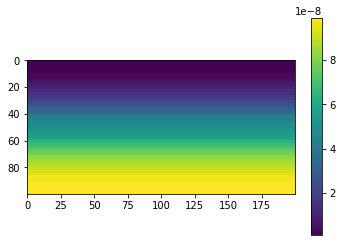

In [75]:
plt.imshow(z[index_r])
plt.colorbar()

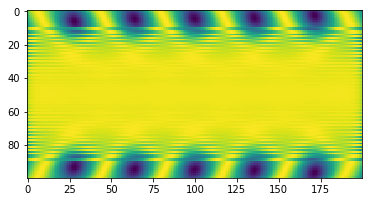

In [70]:
plt.imshow(mz[index_r])

* 比较乱 ，排序

In [80]:
y0[index_r]

array([4.1e-08, 4.3e-08, 4.5e-08, 4.7e-08, 4.9e-08, 5.1e-08, 5.3e-08,
       5.5e-08, 5.7e-08, 5.9e-08, 3.3e-08, 3.5e-08, 6.5e-08, 6.7e-08,
       2.9e-08, 7.1e-08, 2.5e-08, 7.5e-08, 2.3e-08, 7.7e-08, 1.9e-08,
       8.1e-08, 1.7e-08, 8.3e-08, 1.5e-08, 8.5e-08, 1.3e-08, 8.7e-08,
       1.1e-08, 8.9e-08, 9.0e-09, 9.1e-08, 7.0e-09, 9.3e-08, 5.0e-09,
       9.5e-08, 3.0e-09, 9.7e-08, 3.0e-09, 9.7e-08, 1.0e-09, 9.9e-08,
       1.0e-09, 9.9e-08, 1.0e-09, 9.9e-08, 1.0e-09, 9.9e-08, 1.0e-09,
       9.9e-08, 1.0e-09, 9.9e-08, 1.0e-09, 9.9e-08, 1.0e-09, 9.9e-08,
       1.0e-09, 9.9e-08, 1.0e-09, 9.9e-08, 3.0e-09, 9.7e-08, 3.0e-09,
       9.7e-08, 5.0e-09, 9.5e-08, 7.0e-09, 9.3e-08, 9.0e-09, 9.1e-08,
       1.1e-08, 8.9e-08, 1.3e-08, 8.7e-08, 1.5e-08, 8.5e-08, 1.7e-08,
       8.3e-08, 1.9e-08, 8.1e-08, 2.3e-08, 7.7e-08, 2.5e-08, 7.5e-08,
       2.9e-08, 7.1e-08, 3.3e-08, 3.5e-08, 6.5e-08, 6.7e-08, 4.1e-08,
       4.3e-08, 4.5e-08, 4.7e-08, 4.9e-08, 5.1e-08, 5.3e-08, 5.5e-08,
       5.7e-08, 5.9e

In [81]:
    #减去平均值可以方便的得到以圆柱为中心的
    cy=y0[index_r]-center[0]
    cz=z0[index_r]-center[1]
    

In [107]:
#用arccos函数计算每一点与y轴正向的夹角
thetaY=np.arccos(cy/np.sqrt(cy**2+cz**2))
thetaY[cz<0]=2*np.pi-thetaY[cz<0]

In [94]:
thetaY

array([4.53074015, 4.57049193, 4.61070013, 4.65124082, 4.69198365,
       4.73279431, 4.77353714, 4.81407783, 4.85428603, 4.89403781,
       4.36532738, 4.40345824, 5.02131972, 5.05945058, 4.27576182,
       5.14901614, 4.18576171, 5.23901625, 4.13003603, 5.29474193,
       4.04078282, 5.38399514, 3.9840716 , 5.44070636, 3.92699082,
       5.49778714, 3.86991003, 5.55486793, 3.81319881, 5.61157915,
       3.7239456 , 5.70083236, 3.66821993, 5.75655804, 3.57821981,
       5.84655815, 3.48865426, 5.9361237 , 3.4505234 , 5.97425456,
       3.32324148, 6.10153648, 3.28348971, 6.14128825, 3.24328151,
       6.18149646, 3.20274082, 6.22203714, 3.16199798, 6.26277998,
       3.12118732, 0.02040533, 3.08044449, 0.06114816, 3.0399038 ,
       0.10168885, 2.9996956 , 0.14189705, 2.95994382, 0.18164883,
       2.83266191, 0.30893074, 2.79453105, 0.3470616 , 2.70496549,
       0.43662716, 2.61496538, 0.52662727, 2.55923971, 0.58235295,
       2.4699865 , 0.67160616, 2.41327527, 0.72831738, 2.35619

In [108]:
'''从小到大的排列方式的位置索引。这个索引的作用对象是已经用距离筛选过的数据。'''
index_thetaY=np.argsort(thetaY)
thetaY=thetaY[index_thetaY]

In [111]:
index_thetaY

array([51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83,
       85, 89, 88, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 87, 86, 84, 82,
       80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48,
       46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 15, 17, 19,
       21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49],
      dtype=int64)

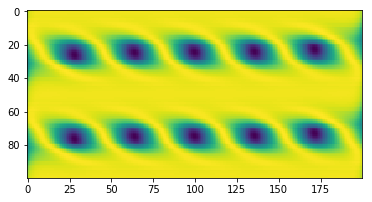

In [120]:
plt.imshow(mz[index_r][index_thetaY])

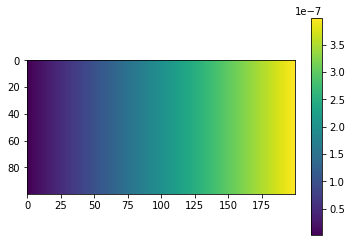

In [124]:

plt.imshow(x[index_r][index_thetaY])
plt.colorbar()

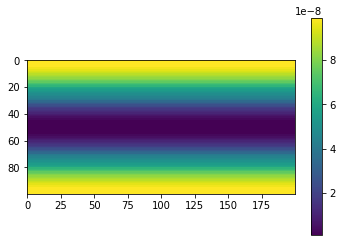

In [125]:
plt.imshow(y[index_r][index_thetaY])
plt.colorbar()

# 排序